# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Общий вывод
По итогам исследования мы выяснили, что наибольшее количество объектов недвижимости имеют `площадь` от **30** до **75** кв. метров. Наиболее распространённый показатель `жилой площади` - **около 20** и **около 30** кв. метров. А `площадь кухни` от **5** до **15** кв. метров. \
`Цены` на большее количество объектов находятся в диапазоне между **2,5** и **6,5** млн. Чаще всего это квартиры с **1-3** `комнатами` и `высотой потолков` в районе **2,5 - 2,8** м., находящиеся на `этажах` до **6**. \
Данные квартиры в среднем находятся в **13-15** км от центра города, в **30** км от аэропорта и в **500** м от ближайшего парка. \
\
`Объявления` чаще `размещались` по **рабочим дням** и более активно **весной** и **осенью**. В среднем `размещение` было на протяжении **165** дней, хотя медианное значение (**92**) указывает на существенное влияние крайних значений - таких как, например, **1** день и **1000** дней. \
\
В ходе исследования было установлено, что набольшее влияние на `стоимость объекта` имеют `общая` и `жилая площадь` - чем **больше площадь**, тем **выше цена**; `количество комнат` - чем **больше комнат**, тем **выше цена** и `тип этажа` квартиры - квартиры на **первых** и **последних** этажах в среднем дешевле. \
Что касается зависимости от `дня`, `месяца` и `года` размещения объявления, то подтверждается факт большего спроса на квартиры **весной** и **осенью** - пиками корреляции между `стоимостью` и `месяцем размещения`, а также выделяется факт большого числа **дорогих объектов** недвижимости, выставленных на продажу в **2014** году. \
\
При анализе распределения объявлений по `населённым пунктам`, ожидаемо и с большим отрывом лидирует **Санкт-Петербург**. Также он лидирует и по `средней стоимости квадратного метра` недвижимости. Но если количество объявлений в **Санкт-Петербурге** в среднем почти в **40** раз больше других `населённых пунктов`, `цена за квадратный метр` отличается незначительно, за исключением **Выборга**, **Гатчины** и **Всеволожска**. \
\
Что касается `средней стоимости` недвижимости в зависимости от `удалённости от центра города`, то ожидаемо видна прямая зависимость - чем **дальше от центра**, тем **средняя стоимость жилья ниже** за исключением значения в **27** км, так как на этом расстоянии находится какой-то элитный жилой комплекс и это видно по всплеску на графике.

### Откройте файл с данными и изучите общую информацию. 

In [1]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt

# читаем файл csv, видим разделитель и указываем его в параметре "sep"
data = pd.read_csv('real_estate_data.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [2]:
# изучаем общую информацию о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

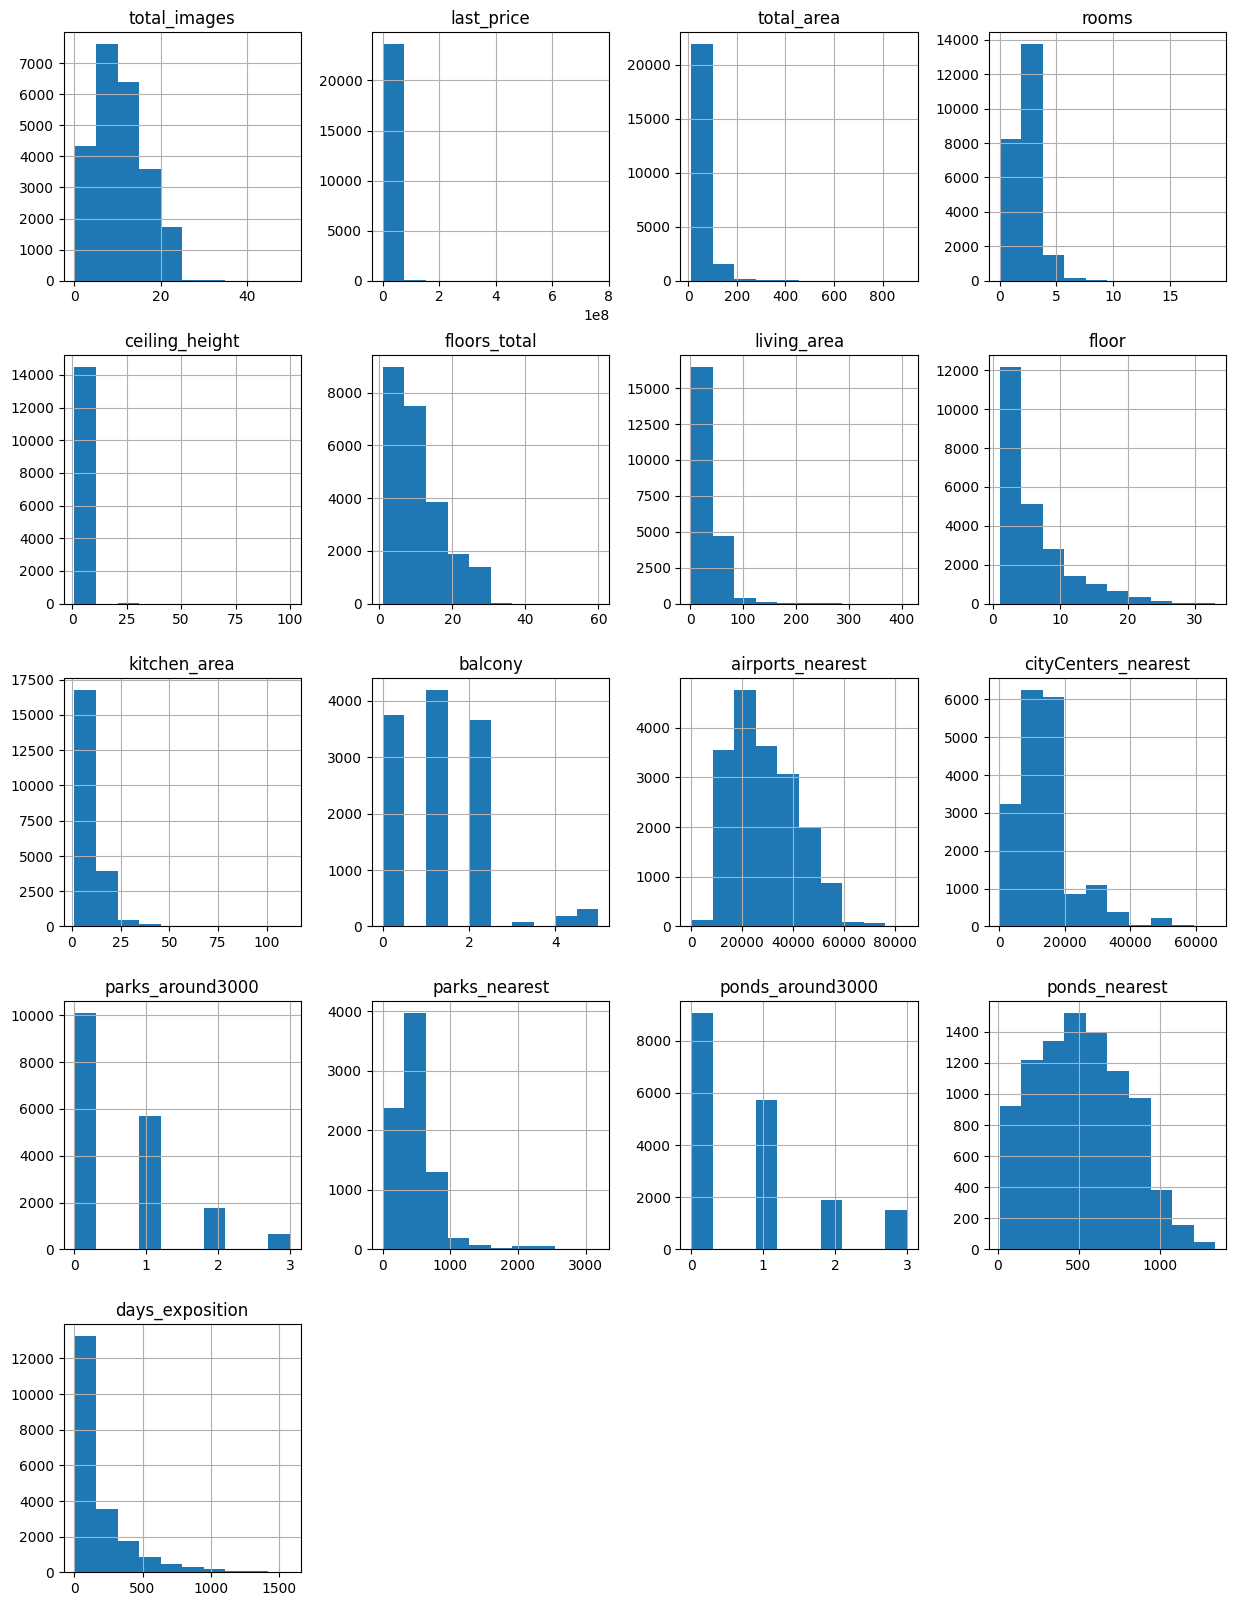

In [4]:
# строим гистограммы для всех столбцов
data.hist(figsize=(15, 20))

### Предобработка данных

In [5]:
# ищем пропущенные значения
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Видим, что во многих столбцах есть пропущенные значения. Переходим к работе с ними. \
В `ceiling_height` указана высота потолков. Значения могут быть пропущены, так как хозяин не знает точную цифру. Заполним пропуски медианным значением.

In [6]:
# заполняем пропуски
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()
# проверяем результат
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Во `floors_total` указано количество этажей в доме. Пропущенных значений не очень много, на дальнейшие исследования они повлияют слабо. Возможно люди посчитали эти данные не важными при описании помещения и потому не заполнили.Заменим пропущенные значения на значения из столбца `floor`. В нём нет пропущенных значений и количество этажей в доме точно не меньше этажа помещения.

In [7]:
# заполняем пропуски
data.loc[data['floors_total'].isna(), 'floors_total'] = data['floor']
# проверяем результат
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В `living_area` указана жилая площадь. Данные могут быть пропущены, так как обычно больше в ходу общая площадь помещения. Логичнее всего заполнить пропуски медианным значением в зависимости от количества комнат в помещении.

In [8]:
# заполняем пропуски
for rooms_amount in data['rooms'].unique():
    data.loc[(data['rooms'] == rooms_amount) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[data['rooms'] == rooms_amount, 'living_area'].median()
# проверяем результат
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

`is_apartment` - столбец с категориальными значениями, следовательно, логичнее всего все пропущенные значения отметить как `False`, так как хозяева аппартаментов должны знать про этот статус своего помещения. 

In [9]:
# заполняем пропуски
data.loc[data['is_apartment'].isna(), 'is_apartment'] = False
# проверяем результат
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Столбец `kitchen_area` заполним аналогично `living_area`: медианой в зависимости от количества комнат. Данные пропущены, возможно, по той же причине, что и в `living_area`. В процессе выяснилось, что у студий площадь `kitchen_area` не указана. Укажем как `0`, так как в студиях сложно разделить жилую площадь и площадь кухни.

In [10]:
# заполняем пропуски
data.loc[data['studio'] == True, 'kitchen_area'] == 0
data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = data['kitchen_area'].median()
# проверяем результат
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В столбце `balcony` указано количество балконов. Заполним пропуски `0`, так как наличие балконов и их число точно должно быть известно хозяину помещения.

In [11]:
# заполняем пропуски
data.loc[data['balcony'].isna(), 'balcony'] = 0
# проверяем результат
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В столбце `locality_name` указано название населённого пункта, поэтому заполнить пропуски здесь не получится.

В столбцах
- `airports_nearest`
- `cityCenters_nearest`
- `parks_around3000`
- `parks_nearest`
- `ponds_around3000`
- `ponds_nearest` \
можно либо оставить пропущенные значения, либо заполнить медианными значениями, так как более точно это сделать не получится. Данные могут быть не заполнены потому что не был указан точный адрес жилого помещения, чтобы программа рассчитала расстояния.

In [12]:
# заполняем пропуски
data.loc[data['airports_nearest'].isna(), 'airports_nearest'] = data['airports_nearest'].median()

data.loc[data['cityCenters_nearest'].isna(), 'cityCenters_nearest'] = data['cityCenters_nearest'].median()

data.loc[data['parks_around3000'].isna(), 'parks_around3000'] = data['parks_around3000'].median()

data.loc[data['parks_nearest'].isna(), 'parks_nearest'] = data['parks_nearest'].median()

data.loc[data['ponds_around3000'].isna(), 'ponds_around3000'] = data['ponds_around3000'].median()

data.loc[data['ponds_nearest'].isna(), 'ponds_nearest'] = data['ponds_nearest'].median()

# проверяем результат
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name             49
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3181
dtype: int64

Попробуем понять, как появились пропуски в `days_exposition`.

<AxesSubplot:xlabel='first_day_exposition'>

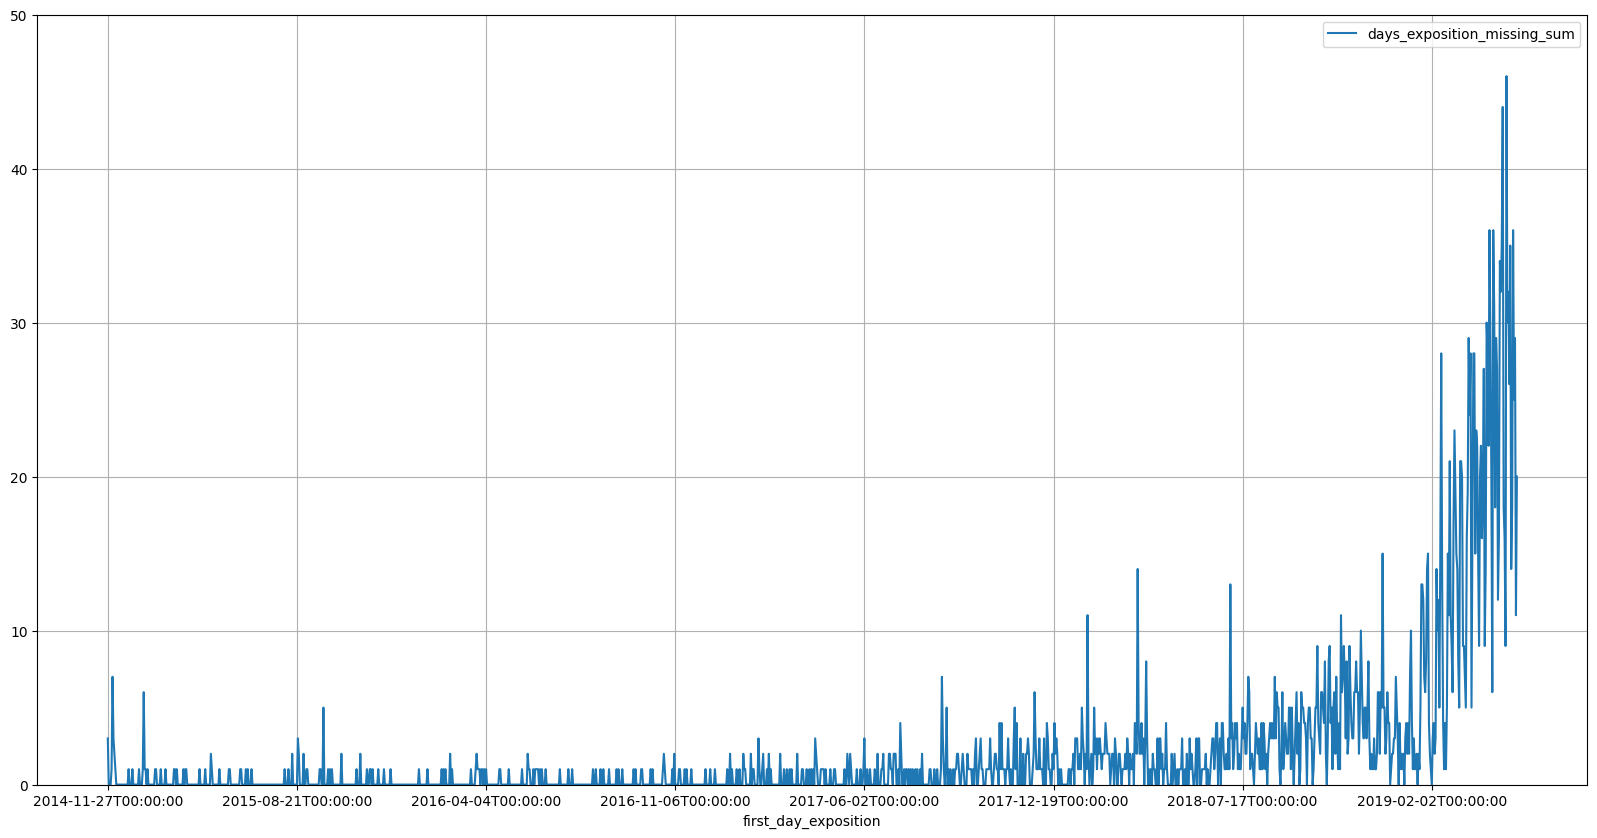

In [13]:
# создаём столбец с проверкой на пропуски
data['days_exposition_missing'] = data['days_exposition'].isna()
# группируем данные по дню публикации объявления
data_days_pivot = data.pivot_table(
    index='first_day_exposition',
    values='days_exposition_missing',
    aggfunc='sum') \
    .sort_values(by='first_day_exposition')
data_days_pivot.columns = ['days_exposition_missing_sum']
data_days_pivot.plot(ylim=(0, 50), grid=True, figsize=(20, 10))

По данным видно, что большая часть пустых значений приходится на самые свежие объявления, а следовательно, эти объекты могут быть ещё не проданы. Оставим пропуски незаполненными, так как заполнение может существенно повлиять на результаты.

Изучим типы данных столбцов.

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   total_images             23699 non-null  int64  
 1   last_price               23699 non-null  float64
 2   total_area               23699 non-null  float64
 3   first_day_exposition     23699 non-null  object 
 4   rooms                    23699 non-null  int64  
 5   ceiling_height           23699 non-null  float64
 6   floors_total             23699 non-null  float64
 7   living_area              23699 non-null  float64
 8   floor                    23699 non-null  int64  
 9   is_apartment             23699 non-null  object 
 10  studio                   23699 non-null  bool   
 11  open_plan                23699 non-null  bool   
 12  kitchen_area             23699 non-null  float64
 13  balcony                  23699 non-null  float64
 14  locality_name         

В столбцах `floors_total`, `balcony`, `parks_around3000` и `ponds_around3000` нужно изменить тип данных на цельно числовой, так как число этажей, балконов, парков и водоёмов не может быть дробным. В `is_apartment` стоит изменить тип данных на булев, так как в столбце содержатся только булевы значения. В `first_day_exposition` следует поменять тип данных на дату.

In [15]:
# меняем тип данных
data = data.astype(
    {'floors_total': 'int64',
     'balcony': 'int64',
     'parks_around3000': 'int64',
     'ponds_around3000': 'int64',
     'is_apartment': 'bool'}
)

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], 
                                              format='%Y-%m-%d')
# проверяем результат
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             23699 non-null  int64         
 1   last_price               23699 non-null  float64       
 2   total_area               23699 non-null  float64       
 3   first_day_exposition     23699 non-null  datetime64[ns]
 4   rooms                    23699 non-null  int64         
 5   ceiling_height           23699 non-null  float64       
 6   floors_total             23699 non-null  int64         
 7   living_area              23699 non-null  float64       
 8   floor                    23699 non-null  int64         
 9   is_apartment             23699 non-null  bool          
 10  studio                   23699 non-null  bool          
 11  open_plan                23699 non-null  bool          
 12  kitchen_area             23699 n

Устраним дубликаты в столбце `locality_name`.

In [34]:
# изучаем уникальные значения
data['locality_name'].unique()

# пишем цикл для замены дублирующих названий пустым местом
for i in ['деревня',
          'поселок',
          'посёлок',
          'станции',
          'садовое товарищество',
          'городской',
          'городского',
          'типа',
          'село',
          'садоводческое',
          'некоммерческое',
          'при железнодорожной',
          'коттеджный']:
    data['locality_name'] = data['locality_name'].str.replace(i, '')
    
# проверяем результат, убираем лишние пробелы
data['locality_name'].str.strip().unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

## Очистим датафрейм от редких и выбивающихся значений

count    23699.000000
mean         9.858475
std          5.682529
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

(0.0, 50.0)

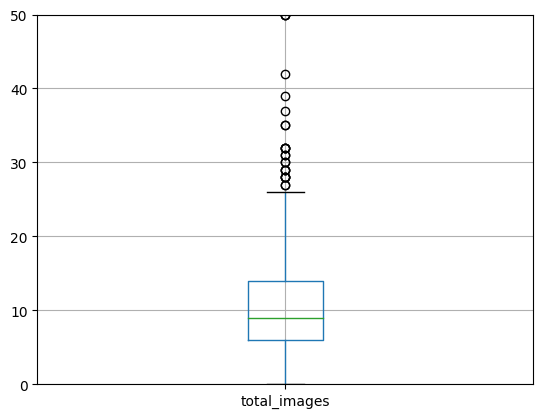

In [35]:
# столбец "total_images"
# смотрим описание, определяем выбросы
display(data['total_images'].describe())
# data['total_images'].hist(bins=100)
data.boxplot('total_images')
plt.ylim(0, 50)
# возможно, 50 фотографий для объявления многовато, но не является невозможным значением

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

22991

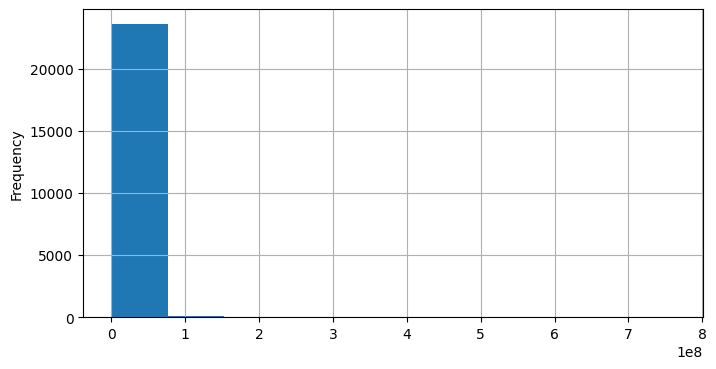

In [36]:
# столбец "last_price"
# смотрим описание, определяем выбросы
display(data['last_price'].describe())
data['last_price'].plot(
    kind='hist',
    grid=True,
    bins=10,
    figsize = (8, 4)
)
# data.boxplot('last_price')
# plt.ylim(0, 20000000)
# видим минимальное значение - 12190 и множество точек за границей усов
# цены на недвижимость могут сильно различаться, но 12190 - точно выброс, а значения выше 20 млн. могут исказить результаты
# отсеиваем минимальное значение и значения выше 20 млн.
data_new = data.loc[(data['last_price'] <= 20000000) &
                   (data['last_price'] >= 100000)]
# проверяем оставшееся количество строк
len(data_new)

count    22991.000000
mean        56.732671
std         24.808407
min         12.000000
25%         40.000000
50%         51.000000
75%         67.100000
max        460.800000
Name: total_area, dtype: float64

22949

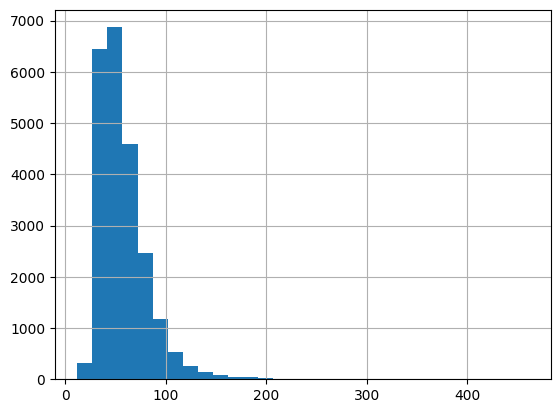

In [37]:
# столбец "total_area"
# смотрим описание, определяем выбросы
display(data_new['total_area'].describe())
data_new['total_area'].hist(bins=30)
# data_new.boxplot('total_area')
# plt.ylim(0, 600)
# по гистограмме видим, что после 200 м2 очень мало данных
# отсеиваем по площади  до 200 м2
data_new = data_new.loc[data_new['total_area'] <= 200]
# проверяем оставшееся количество строк
len(data_new)

count    22934.000000
mean         2.000044
std          0.960998
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

22934

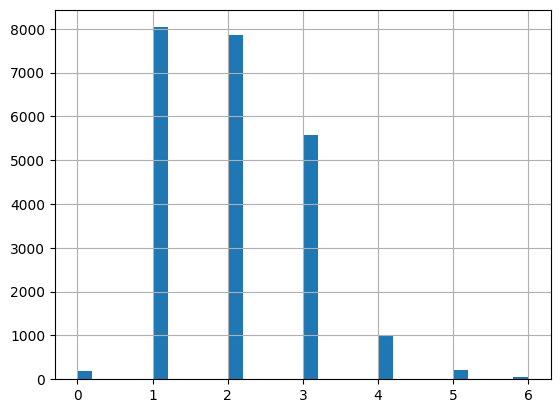

In [39]:
# столбец "rooms"
# смотрим описание, определяем выбросы
display(data_new['rooms'].describe())
data_new['rooms'].hist(bins=30)
# data_new.boxplot('rooms')
# plt.ylim(0, 10)
# мы уже знаем, что 0 комнат - это студии, поэтому их отсеевать не будем
# отсеем значения больше 6 комнат
data_new = data_new.loc[data_new['rooms'] <= 6]
# проверяем оставшееся количество строк
len(data_new)

count    22934.000000
mean         2.714258
std          0.999888
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Значений больше 10 метров: 25


22821

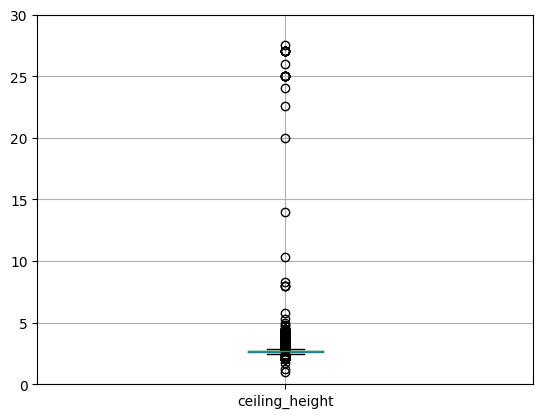

In [40]:
# столбец "ceiling_height"
# смотрим описание, определяем выбросы
display(data_new['ceiling_height'].describe())
# data_new['ceiling_height'].hist(bins=7)
data_new.boxplot('ceiling_height')
plt.ylim(0, 30)
# видим неправдоподобные значения, проверим сколько их
print("Значений больше 10 метров:", len(data.loc[data['ceiling_height'] > 10]))
# сначала убираем значения выше 10 м
data_new.loc[data_new['ceiling_height'] >= 10, 'ceiling_height'] = data_new['ceiling_height'] / 10
# убираем выбросы с учётом, что нормальная высота потолка от 2,5 до 4 м
data_new = data_new.loc[(data_new['ceiling_height'] >= 2.5) & 
                        (data_new['ceiling_height'] <= 4)]
# проверяем оставшееся количество строк
len(data_new)

count    22821.000000
mean        10.761798
std          6.634271
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

22790

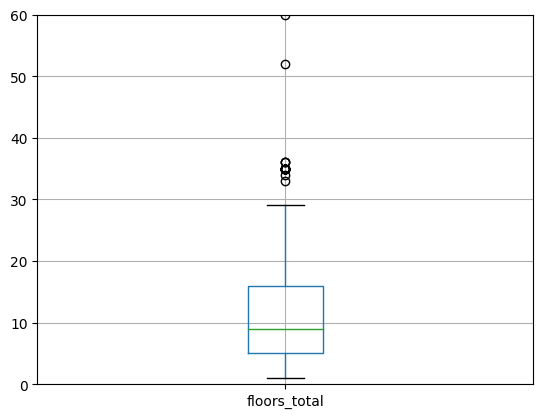

In [41]:
# столбец "floors_total"
# смотрим описание, определяем выбросы
display(data_new['floors_total'].describe())
# data_new['floors_total'].hist(bins=100)
data_new.boxplot('floors_total')
plt.ylim(0, 60)
# отсеиваем по этажу до 30
data_new = data_new.loc[data_new['floors_total'] <= 30]
# проверяем оставшееся количество строк
len(data_new)

count    22790.000000
mean        32.212346
std         15.776386
min          2.000000
25%         18.100000
50%         30.000000
75%         41.500000
max        159.600000
Name: living_area, dtype: float64

22755

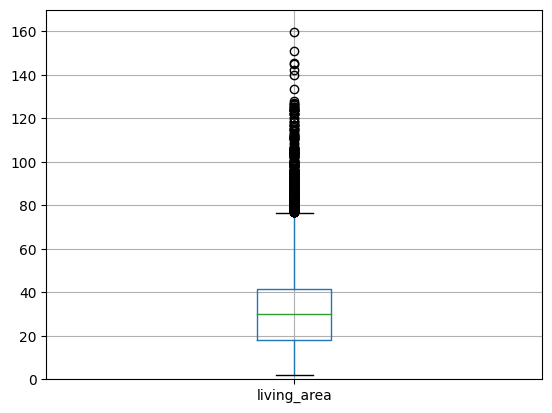

In [42]:
# столбец "living_area"
# смотрим описание, определяем выбросы
display(data_new['living_area'].describe())
# data_new['living_area'].hist(bins=100)
data_new.boxplot('living_area')
plt.ylim(0, 170)
# жилая площадь не может быть больше общей, отсеиваем эти значения и убираем выделяющиеся строки с площадью более 140 м2
data_new = data_new.loc[(data_new['living_area'] <= 140) &
                       (data_new['living_area'] < data_new['total_area'])]
# проверяем оставшееся количество строк
len(data_new)

count    22755.000000
mean         5.892595
std          4.880138
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64

(0.0, 30.0)

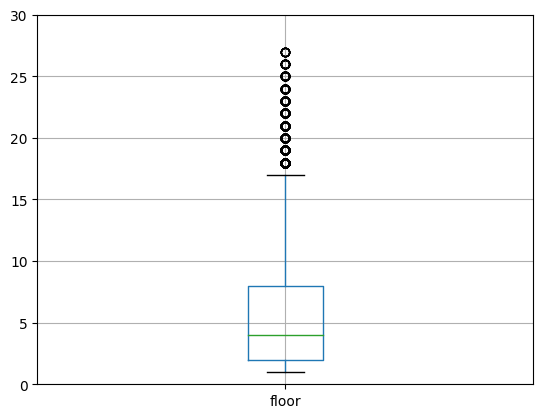

In [43]:
# столбец "floor"
# смотрим описание, определяем выбросы
display(data_new['floor'].describe())
# data_new['floor'].hist(bins=30)
data_new.boxplot('floor')
plt.ylim(0, 30)
# есть несколько значений, которые диаграма размаха принимает за выбросы, но критичных отклонений нет, оставляем все данные

count    22755.000000
mean         9.990804
std          4.424484
min          1.300000
25%          7.200000
50%          9.100000
75%         11.000000
max         64.000000
Name: kitchen_area, dtype: float64

22753

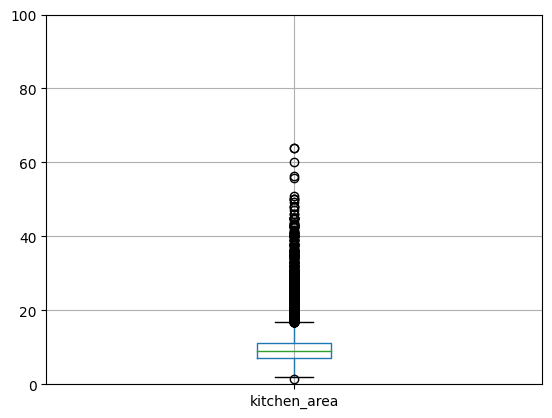

In [44]:
# столбец "kitchen_area"
# смотрим описание, определяем выбросы
display(data_new['kitchen_area'].describe())
# data_new['kitchen_area'].hist(bins=50)
data_new.boxplot('kitchen_area')
plt.ylim(0, 100)
# убираем выделяющиеся строки с площадью более 60 м2
data_new = data_new.loc[data_new['kitchen_area'] <= 60]
# проверяем оставшееся количество строк
len(data_new)

count    22753.000000
mean         0.593372
std          0.954850
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64

(0.0, 10.0)

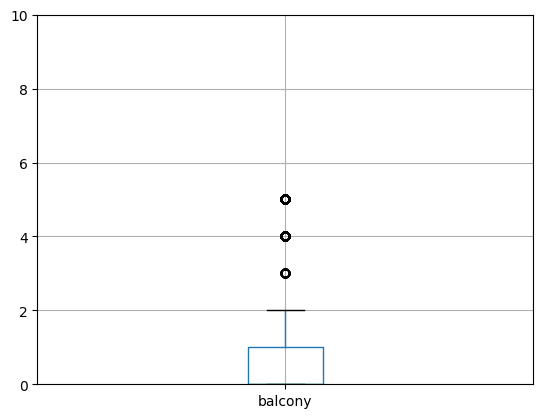

In [45]:
# столбец "balcony"
# смотрим описание, определяем выбросы
display(data_new['balcony'].describe())
# data_new['balcony'].hist(bins=10)
data_new.boxplot('balcony')
plt.ylim(0, 10)
# редкие значения есть, но они не являются невозможными, оставляем все данные

count    22753.000000
mean     28375.458753
std      11202.768408
min          0.000000
25%      20994.000000
50%      26726.000000
75%      34647.000000
max      84869.000000
Name: airports_nearest, dtype: float64

22743

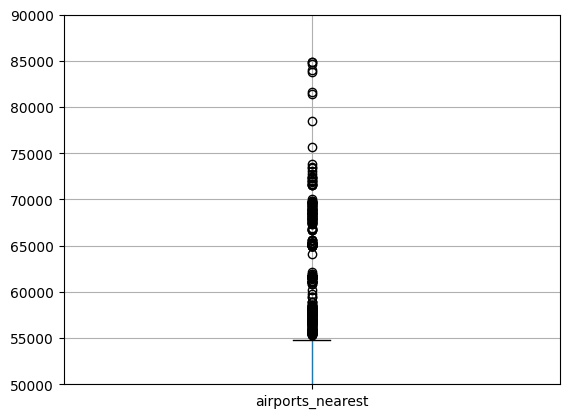

In [46]:
# столбец "airports_nearest"
# смотрим описание, определяем выбросы
display(data_new['airports_nearest'].describe())
# data_new['airports_nearest'].hist(bins=10)
data_new.boxplot('airports_nearest')
plt.ylim(50000, 90000)
# убираем минимальное значение и значения до 3000, так как на таком расстоянии запрещены постройки
# также убираем радкие значения выше 75000
data_new = data_new.loc[(data_new['airports_nearest'] <= 75000) &
                       (data_new['airports_nearest'] > 3000)]
# проверяем оставшееся количество строк
len(data_new)

count    22743.000000
mean     14157.242558
std       7434.241881
min        208.000000
25%      11312.000000
50%      13098.500000
75%      15377.500000
max      61495.000000
Name: cityCenters_nearest, dtype: float64

22740

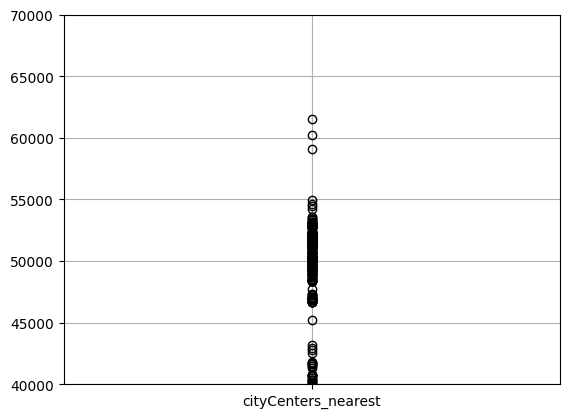

In [47]:
# столбец "cityCenters_nearest"
# смотрим описание, определяем выбросы
display(data_new['cityCenters_nearest'].describe())
# data_new['cityCenters_nearest'].hist(bins=50)
data_new.boxplot('cityCenters_nearest')
plt.ylim(40000, 70000)
# убираем радкие значения выше 55000
data_new = data_new.loc[data_new['cityCenters_nearest'] <= 55000]
# проверяем оставшееся количество строк
len(data_new)

count    22740.000000
mean         0.443843
std          0.724002
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64

<AxesSubplot:>

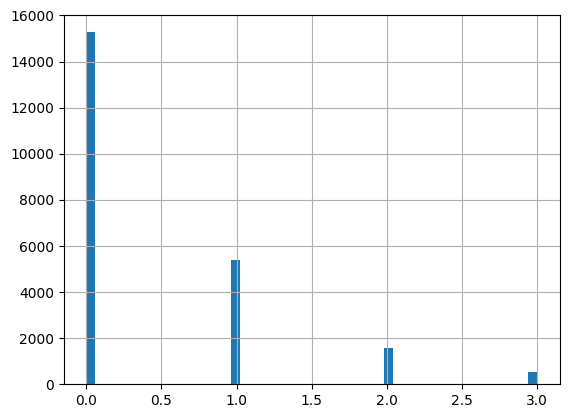

In [48]:
# столбец "parks_around3000"
# смотрим описание, определяем выбросы
display(data_new['parks_around3000'].describe())
data_new['parks_around3000'].hist(bins=50)
# data_new.boxplot('parks_around3000')
# plt.ylim(0, 5)
# редких значений нет, оставляем все данные

count    22740.000000
mean       467.773043
std        197.521815
min          1.000000
25%        455.000000
50%        455.000000
75%        455.000000
max       3190.000000
Name: parks_nearest, dtype: float64

22734

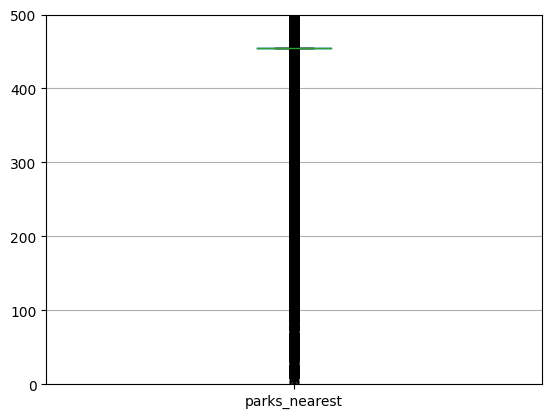

In [49]:
# столбец "parks_nearest"
# смотрим описание, определяем выбросы
display(data_new['parks_nearest'].describe())
# data_new['parks_nearest'].hist(bins=50)
data_new.boxplot('parks_nearest')
plt.ylim(0, 500)
# дом вряд ли может находиться менее, чем в 10 метрах от парка, отсеиваем эти значеиня
data_new = data_new.loc[data_new['parks_nearest'] >= 10]
# проверяем оставшееся количество строк
len(data_new)

count    22734.000000
mean         0.799771
std          0.803934
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64

<AxesSubplot:>

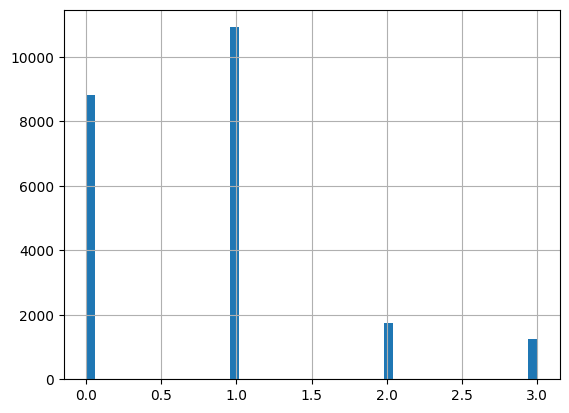

In [50]:
# столбец "ponds_around3000"
# смотрим описание, определяем выбросы
display(data_new['ponds_around3000'].describe())
data_new['ponds_around3000'].hist(bins=50)
# data_new.boxplot('ponds_around3000')
# plt.ylim(0, 5)
# редких значений нет, оставляем все данные

count    22734.000000
mean       511.077329
std        169.245180
min         13.000000
25%        502.000000
50%        502.000000
75%        502.000000
max       1344.000000
Name: ponds_nearest, dtype: float64

22692

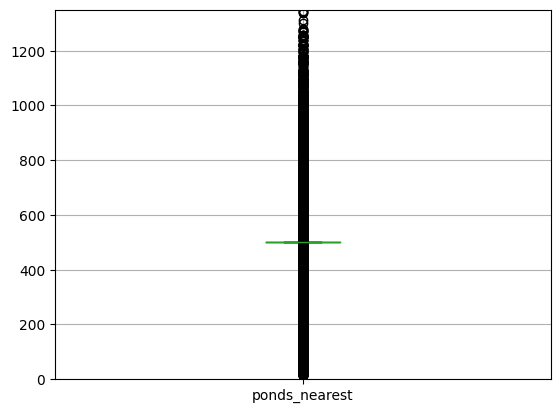

In [51]:
# столбец "ponds_nearest"
# смотрим описание, определяем выбросы
display(data_new['ponds_nearest'].describe())
# data_new['ponds_nearest'].hist(bins=50)
data_new.boxplot('ponds_nearest')
plt.ylim(0, 1350)
# предположим, что пруд не может быть ближе 30 метров от дома, отсеиваем эти значения
data_new = data_new.loc[data_new['ponds_nearest'] > 30]
# проверяем оставшееся количество строк
len(data_new)

count    19760.000000
mean       177.648077
std        216.270453
min          1.000000
25%         44.000000
50%         93.000000
75%        226.000000
max       1580.000000
Name: days_exposition, dtype: float64

19513

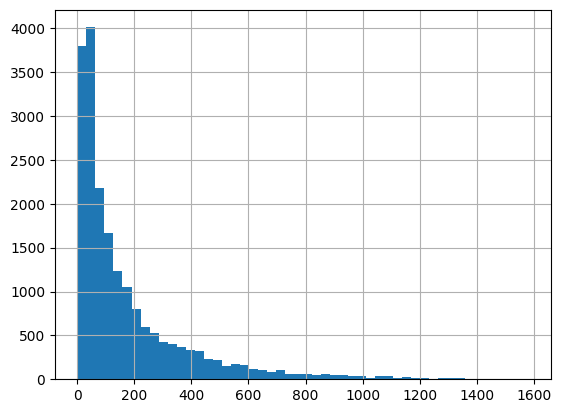

In [52]:
# столбец "days_exposition"
# смотрим описание, определяем выбросы
display(data_new['days_exposition'].describe())
data_new['days_exposition'].hist(bins=50)
# data_new.boxplot('days_exposition')
# plt.ylim(1350, 1600)
# отсеиваем крайние значения более 1000
data_new = data_new.loc[data_new['days_exposition'] <= 1000]
# проверяем оставшееся количество строк
len(data_new)

In [53]:
# предобработка завершена
print("Удалено", 
      len(data) - len(data_new), 
      "строки, это",
      '{:.2f}'.format(100 - len(data_new) * 100 / len(data)) + 
      "%"
     )
print()
data_new.info()

Удалено 4186 строки, это 17.66%

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19513 entries, 1 to 23697
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             19513 non-null  int64         
 1   last_price               19513 non-null  float64       
 2   total_area               19513 non-null  float64       
 3   first_day_exposition     19513 non-null  datetime64[ns]
 4   rooms                    19513 non-null  int64         
 5   ceiling_height           19513 non-null  float64       
 6   floors_total             19513 non-null  int64         
 7   living_area              19513 non-null  float64       
 8   floor                    19513 non-null  int64         
 9   is_apartment             19513 non-null  bool          
 10  studio                   19513 non-null  bool          
 11  open_plan                19513 non-null  bool          
 12 

Невозможные значения найдены только в `last_price`, `ceiling_height`, `airports_nearest`, `parks_nearest`, `ponds_nearest`. Где это было возможно, они исправлены, остальные удалены. В других столбцах удалены просто редкие значения, существенно, выбивающиеся из общего числа.

### Посчитайте и добавьте в таблицу новые столбцы

In [54]:
# добавляем столбец с рассчётом стоимости 1 м2
data_new['price_per_square_meter'] = round(data_new['last_price'] / data_new['total_area'])
# проверяем результат
data_new.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,days_exposition_missing,price_per_square_meter
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,Шушары,12817.0,18603.0,0,455.0,0,502.0,81.0,False,82921.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,False,92786.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,False,100000.0
5,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,Янино-1,26726.0,13098.5,0,455.0,1,502.0,55.0,False,95066.0
6,6,3700000.0,37.3,2017-11-02,1,2.65,26,10.6,6,False,...,Парголово,52996.0,19143.0,0,455.0,0,502.0,155.0,False,99196.0


In [55]:
# добавляем столбец с днём недели публикации объявления
data_new['day_exposition'] = data_new['first_day_exposition'].dt.weekday
# проверяем результат
data_new.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,days_exposition_missing,price_per_square_meter,day_exposition
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,12817.0,18603.0,0,455.0,0,502.0,81.0,False,82921.0,1
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,21741.0,13933.0,1,90.0,2,574.0,558.0,False,92786.0,3
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,31856.0,8098.0,2,112.0,1,48.0,121.0,False,100000.0,1
5,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,26726.0,13098.5,0,455.0,1,502.0,55.0,False,95066.0,0
6,6,3700000.0,37.3,2017-11-02,1,2.65,26,10.6,6,False,...,52996.0,19143.0,0,455.0,0,502.0,155.0,False,99196.0,3


In [56]:
# добавляем столбец с месяцем публикации объявления
data_new['month_exposition'] = data_new['first_day_exposition'].dt.month
# проверяем результат
data_new.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,days_exposition_missing,price_per_square_meter,day_exposition,month_exposition
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,18603.0,0,455.0,0,502.0,81.0,False,82921.0,1,12
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,13933.0,1,90.0,2,574.0,558.0,False,92786.0,3,8
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,8098.0,2,112.0,1,48.0,121.0,False,100000.0,1,6
5,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,13098.5,0,455.0,1,502.0,55.0,False,95066.0,0,9
6,6,3700000.0,37.3,2017-11-02,1,2.65,26,10.6,6,False,...,19143.0,0,455.0,0,502.0,155.0,False,99196.0,3,11


In [57]:
# добавляем столбец с годом публикации объявления
data_new['year_exposition'] = data_new['first_day_exposition'].dt.year
# проверяем результат
data_new.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,days_exposition_missing,price_per_square_meter,day_exposition,month_exposition,year_exposition
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0,455.0,0,502.0,81.0,False,82921.0,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,1,90.0,2,574.0,558.0,False,92786.0,3,8,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,2,112.0,1,48.0,121.0,False,100000.0,1,6,2018
5,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,0,455.0,1,502.0,55.0,False,95066.0,0,9,2018
6,6,3700000.0,37.3,2017-11-02,1,2.65,26,10.6,6,False,...,0,455.0,0,502.0,155.0,False,99196.0,3,11,2017


In [58]:
# добавляем столбец с типом этажа квартиры
# проведём категоризацию этажей
def categorize_floor(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floors_total == floor:
        return 'последний'
    else:
        return 'другой'

data_new['floor_category'] = data_new.apply(categorize_floor, axis=1)
# проверяем результат
data_new.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,days_exposition_missing,price_per_square_meter,day_exposition,month_exposition,year_exposition,floor_category
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,455.0,0,502.0,81.0,False,82921.0,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,90.0,2,574.0,558.0,False,92786.0,3,8,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1,48.0,121.0,False,100000.0,1,6,2018,другой
5,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,455.0,1,502.0,55.0,False,95066.0,0,9,2018,другой
6,6,3700000.0,37.3,2017-11-02,1,2.65,26,10.6,6,False,...,455.0,0,502.0,155.0,False,99196.0,3,11,2017,другой


In [59]:
# добавляем столбец с расстоянием до центра в км
data_new['cityCenters_nearest_km'] = round(data_new['cityCenters_nearest'] / 1000)
# проверяем результат
data_new.head()
# data_new.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,days_exposition_missing,price_per_square_meter,day_exposition,month_exposition,year_exposition,floor_category,cityCenters_nearest_km
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0,502.0,81.0,False,82921.0,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,2,574.0,558.0,False,92786.0,3,8,2015,другой,14.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1,48.0,121.0,False,100000.0,1,6,2018,другой,8.0
5,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,1,502.0,55.0,False,95066.0,0,9,2018,другой,13.0
6,6,3700000.0,37.3,2017-11-02,1,2.65,26,10.6,6,False,...,0,502.0,155.0,False,99196.0,3,11,2017,другой,19.0


### Проведите исследовательский анализ данных

count    19513.000000
mean        55.210976
std         22.539618
min         12.000000
25%         39.000000
50%         50.000000
75%         65.400000
max        200.000000
Name: total_area, dtype: float64

<AxesSubplot:ylabel='Frequency'>

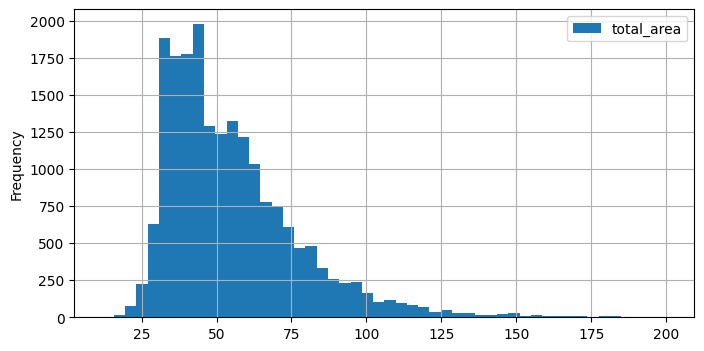

In [60]:
# изучаем общую площадь объектов
display(data_new['total_area'].describe())
data_new['total_area'].plot(
    kind='hist',
    legend=True,
    grid=True,
    bins=50,
    figsize = (8, 4)
)

Наибольшее количество объектов имеет общую площадь от **30** до **75** кв. метров. В этот диапазон укладывается и среднее значение - **55,2** и медианное - **50**. Квартир более **100** кв. метров значительно меньше.

count    19513.000000
mean        31.459049
std         15.216978
min          2.000000
25%         18.000000
50%         29.850000
75%         40.000000
max        140.000000
Name: living_area, dtype: float64

18.0    801
17.6    665
30.5    621
17.0    608
30.0    504
45.0    472
16.0    449
20.0    433
28.0    366
31.0    326
Name: living_area, dtype: int64

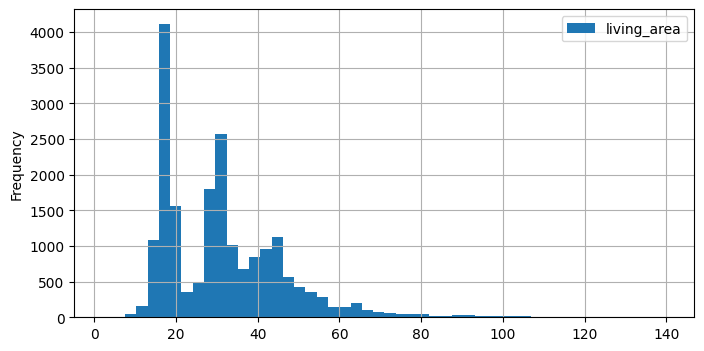

In [61]:
# изучаем жилую площадь объектов
display(data_new['living_area'].describe())
data_new['living_area'].plot(
    kind='hist',
    legend=True,
    grid=True,
    bins=50,
    figsize = (8, 4)
)
data_new['living_area'].value_counts().head(10)

Среднее и медианное значения почти совпадают - **31,4** и **29,8**, соответственно. Наиболее распространённый показатель жилой площади - около **20** и около **30** кв. метров. Очень мало объектов с жилой площадью больше **60** кв. метров.

count    19513.000000
mean         9.891586
std          4.182172
min          2.000000
25%          7.200000
50%          9.100000
75%         11.000000
max         60.000000
Name: kitchen_area, dtype: float64

<AxesSubplot:ylabel='Frequency'>

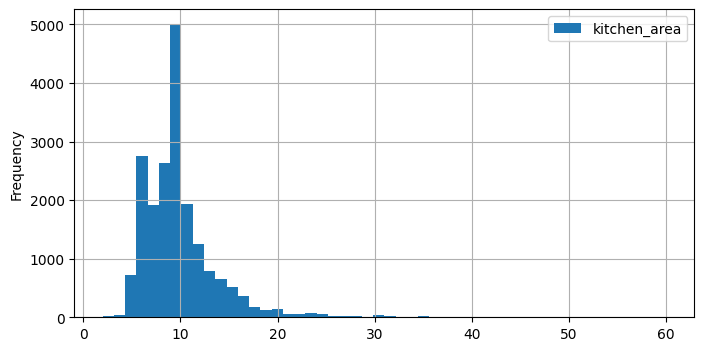

In [62]:
# изучаем площадь кухни объектов
display(data_new['kitchen_area'].describe())
data_new['kitchen_area'].plot(
    kind='hist',
    legend=True,
    grid=True,
    bins=50,
    figsize = (8, 4)
)

Большинство объектов имеет площадь кухни от **5** до **15** кв. метров. Значения более **20** кв. метров очень редки.

count    1.951300e+04
mean     5.221905e+06
std      2.980653e+06
min      4.300000e+05
25%      3.350000e+06
50%      4.450000e+06
75%      6.200000e+06
max      2.000000e+07
Name: last_price, dtype: float64

<AxesSubplot:ylabel='Frequency'>

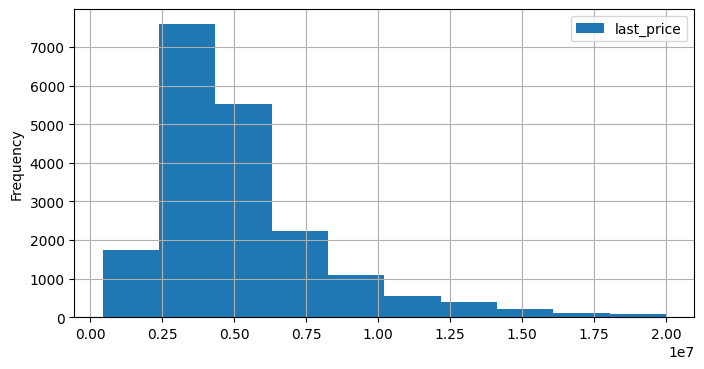

In [63]:
# изучаем цену объектов
display(data_new['last_price'].describe())
data_new['last_price'].plot(
    kind='hist',
    legend=True,
    grid=True,
    bins=10,
    figsize = (8, 4)
)

Большинство объектов имеют цену в диапазоне между **2,5** млн. и **6,5** млн. Объектов с ценами выше **10** млн. значительно меньше.

count    19513.000000
mean         1.957054
std          0.942538
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

<AxesSubplot:ylabel='Frequency'>

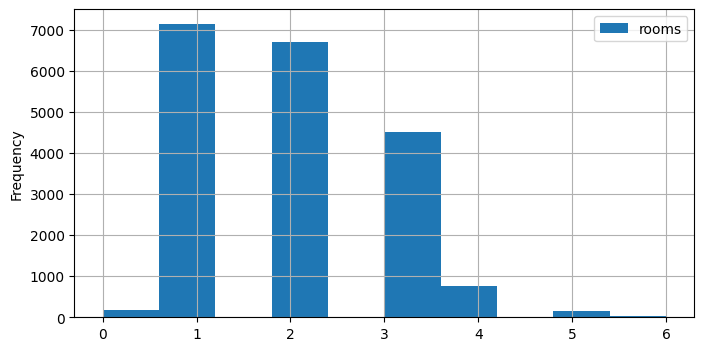

In [64]:
# изучаем количество комнат объектов
display(data_new['rooms'].describe())
data_new['rooms'].plot(
    kind='hist',
    legend=True,
    grid=True,
    bins=10,
    figsize = (8, 4)
)

Среди анализируемых объектов недвижимости, в основном, объекты с **1-3** комнатами. Студий и квартир с количеством комнат более **4** значительно меньше.

count    19513.000000
mean         2.679361
std          0.178946
min          2.500000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:ylabel='Frequency'>

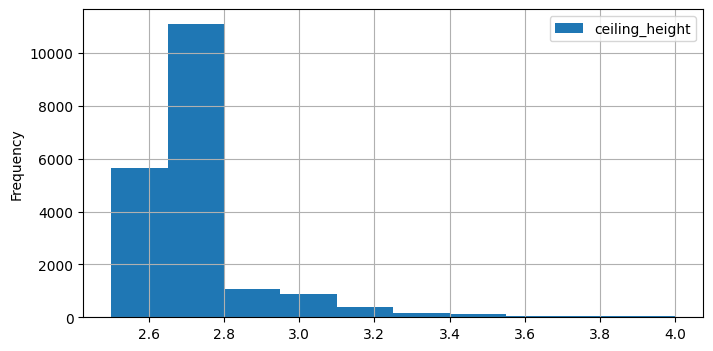

In [65]:
# изучаем высоту потолков объектов
display(data_new['ceiling_height'].describe())
data_new['ceiling_height'].plot(
    kind='hist',
    legend=True,
    grid=True,
    bins=10,
    figsize = (8, 4)
)

Высота потолков большинства объектов находится в диапазоне от **2,5** до **2,8** метров. Объектов с потолками выше **2,8** метров значительно меньше.

count    19513.000000
mean         6.003024
std          4.940528
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64

<AxesSubplot:ylabel='Frequency'>

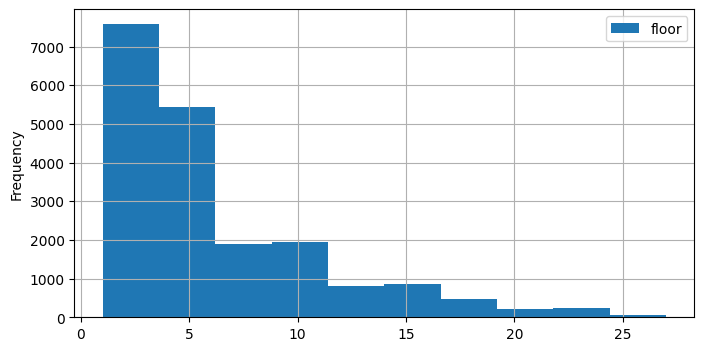

In [66]:
# изучаем этаж объектов
display(data_new['floor'].describe())
data_new['floor'].plot(
    kind='hist',
    legend=True,
    grid=True,
    bins=10,
    figsize = (8, 4)
)

Больше всего объектов с этажём до **6** включительно. Этажи выше **12** встречаются гораздо реже.

<AxesSubplot:>

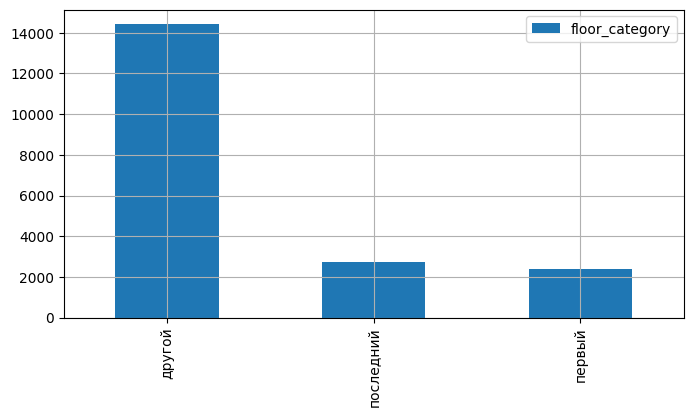

In [67]:
# изучаем тип этажа объектов
data_new['floor_category'] \
    .value_counts() \
    .plot(
    kind='bar',
    legend=True,
    grid=True,
    figsize = (8, 4)
)

Количество объектов на **первом** и **последнем** этаже примерно равно, но значительно меньше, чем количество объявлений на **других** этажах.

count    19513.000000
mean        10.928202
std          6.628219
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         29.000000
Name: floors_total, dtype: float64

<AxesSubplot:ylabel='Frequency'>

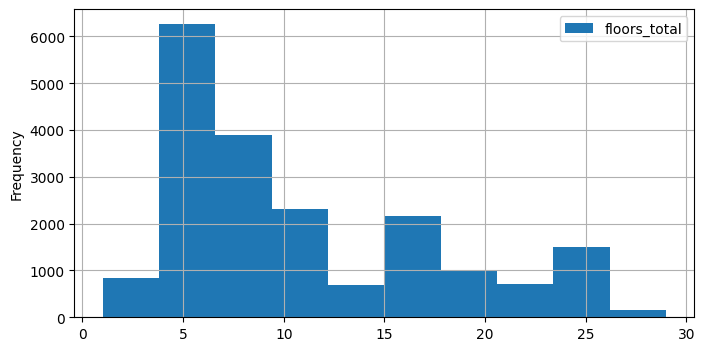

In [68]:
# изучаем количество этажей объектов
display(data_new['floors_total'].describe())
data_new['floors_total'].plot(
    kind='hist',
    legend=True,
    grid=True,
    bins=10,
    figsize = (8, 4)
)

На графике видим пик в районе **4-6** этажей. Хотя среднее (**10,9**) и медианное (**9**) значения указывают на то, что доля многоэтажек всё же больше.

count    19513.000000
mean     14226.617025
std       7397.033332
min        208.000000
25%      11360.000000
50%      13098.500000
75%      15446.000000
max      54926.000000
Name: cityCenters_nearest, dtype: float64

<AxesSubplot:ylabel='Frequency'>

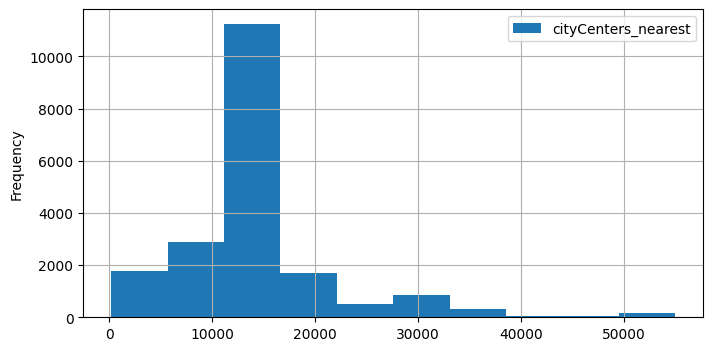

In [69]:
# изучаем расстояние до центра города от объектов
display(data_new['cityCenters_nearest'].describe())
data_new['cityCenters_nearest'].plot(
    kind='hist',
    legend=True,
    grid=True,
    bins=10,
    figsize = (8, 4)
)

В среднем, больше половины объектов находятся примерно в **13-15** км от центра города. Но также есть и объекты в самом центре и на окраине.

count    19513.000000
mean     28414.500948
std      11261.198825
min       6450.000000
25%      20867.000000
50%      26726.000000
75%      34991.000000
max      73827.000000
Name: airports_nearest, dtype: float64

<AxesSubplot:ylabel='Frequency'>

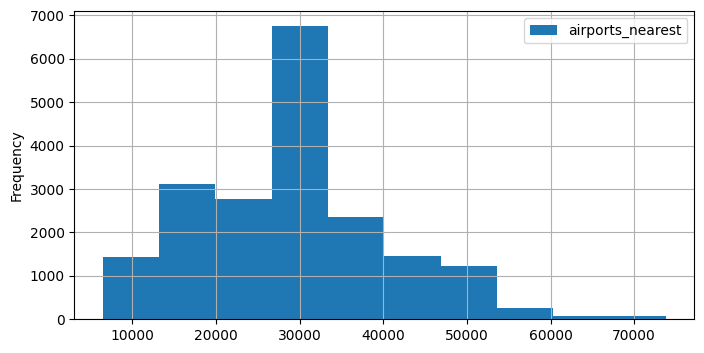

In [70]:
# изучаем расстояние до ближайшего аэропорта от объектов
display(data_new['airports_nearest'].describe())
data_new['airports_nearest'].plot(
    kind='hist',
    legend=True,
    grid=True,
    bins=10,
    figsize = (8, 4)
)

Среднее расстояние до аэропорта от объектов - **около 30 км**. Есть объекты и в **6,5** и в **70** км.

count    19513.000000
mean       466.553221
std        194.546718
min         10.000000
25%        455.000000
50%        455.000000
75%        455.000000
max       3190.000000
Name: parks_nearest, dtype: float64

<AxesSubplot:ylabel='Frequency'>

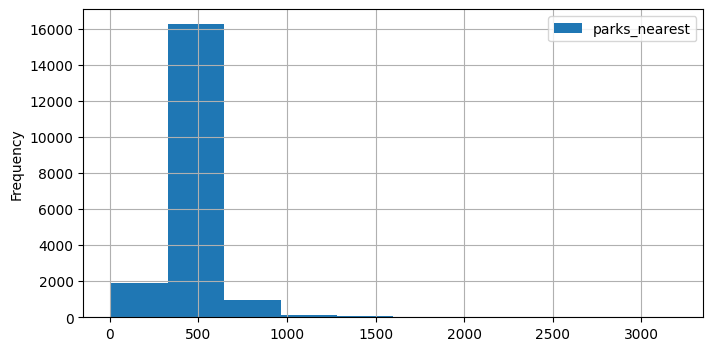

In [71]:
# изучаем расстояние до ближайшего парка от объектов
display(data_new['parks_nearest'].describe())
data_new['parks_nearest'].plot(
    kind='hist',
    legend=True,
    grid=True,
    bins=10,
    figsize = (8, 4)
)

Практически все объекты находятся примерно в **500** м от ближайшего парка.

count    19513.000000
mean         2.587301
std          1.784597
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: day_exposition, dtype: float64

<AxesSubplot:ylabel='Frequency'>

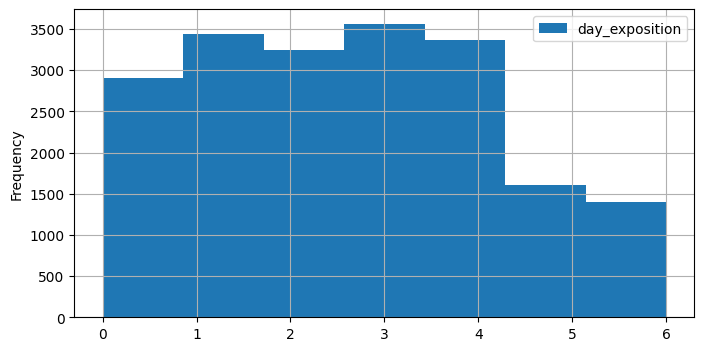

In [72]:
# изучаем день публикации объявлений
display(data_new['day_exposition'].describe())
data_new['day_exposition'].plot(
    kind='hist',
    legend=True,
    grid=True,
    bins=7,
    figsize = (8, 4)
)

По графику видим, что объявления публиковались примерно **одинаково** во все **рабочие дни**, а в **выходные** есть **спад** почти в 2 раза.

count    19513.000000
mean         6.588582
std          3.479448
min          1.000000
25%          3.000000
50%          7.000000
75%         10.000000
max         12.000000
Name: month_exposition, dtype: float64

<AxesSubplot:ylabel='Frequency'>

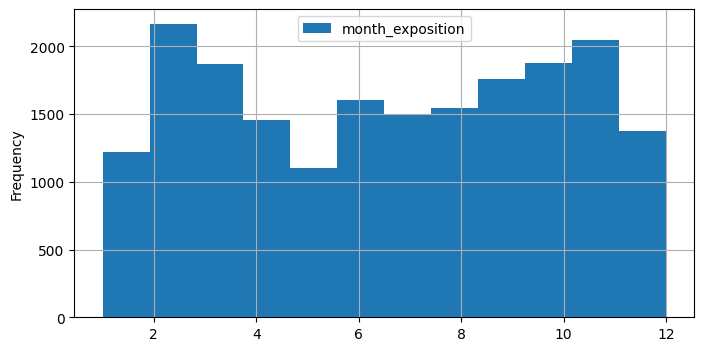

In [73]:
# изучаем месяц публикации объявлений
display(data_new['month_exposition'].describe())
data_new['month_exposition'].plot(
    kind='hist',
    legend=True,
    grid=True,
    bins=12,
    figsize = (8, 4)
)

По месяцам публикации объявления **распределение** примерно **равное**, но есть **спады** в **январе**, **мае** и **декабре**.

count    19513.000000
mean       165.117358
std        185.957060
min          1.000000
25%         44.000000
50%         92.000000
75%        217.000000
max       1000.000000
Name: days_exposition, dtype: float64

45.0    860
60.0    536
7.0     229
30.0    204
4.0     174
90.0    168
3.0     155
5.0     144
14.0    143
20.0    137
Name: days_exposition, dtype: int64

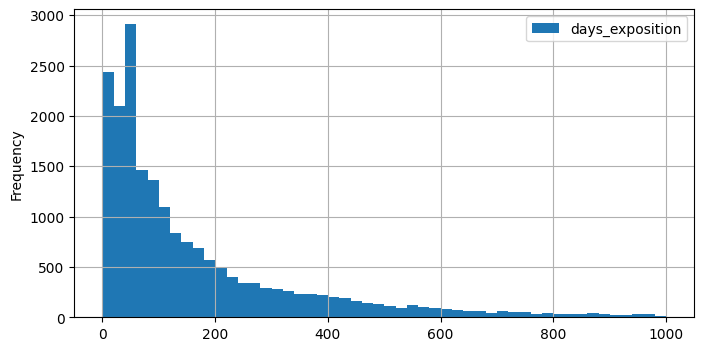

In [74]:
# изучаем срок размещения объявлений
display(data_new['days_exposition'].describe())
data_new['days_exposition'].plot(
    kind='hist',
    legend=True,
    grid=True,
    bins=50,
    figsize = (8, 4)
)
data_new['days_exposition'].value_counts().head(10)

В среднем объекты продаются за **165** дней, хотя медианное значение существенно ниже - **92** дня. Самая быстрая продажа была за **1** день, необычно долгими можно считать все значения выше **217** дней. По графику и с помощью подсчёта значений видим два пика на **45** и **60** дней. Судя по цифрам это могут быть ограничения сайта и если объявление это количество дней не поднималось, то оно снимается автоматически.

## Исследуем влияние различных факторов на цену объекта недвижимости

0.7694778654240294

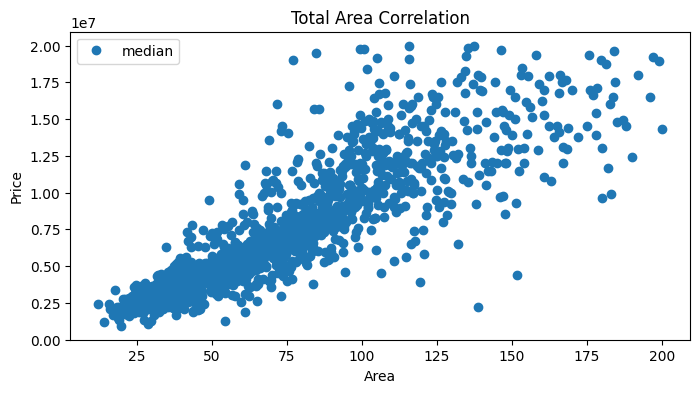

In [75]:
# исследуем зависимость стоимости объекта от общей площади
display(data_new['last_price'].corr(data_new['total_area']))
total_area_pivot_table = data_new.pivot_table(
    index='total_area',
    values='last_price',
    aggfunc=['count', 'mean', 'median']
)
total_area_pivot_table.columns = ['count', 'mean', 'median']
total_area_pivot_table.plot(
    y='median',
    figsize=(8, 4),
    style='o'
)
plt.title('Total Area Correlation')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

И корреляция и диаграмма рассеяния показывают сильную зависимость стоимости от общей площади объекта. Чем больше общая площадь, тем выше цена объекта.

0.640246298287672

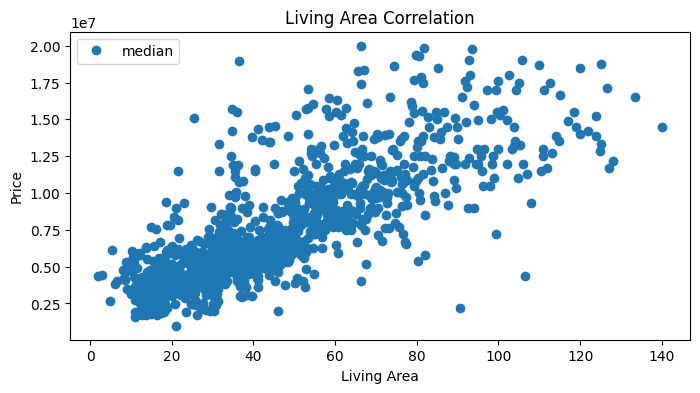

In [76]:
# исследуем зависимость стоимости объекта от жилой площади
display(data_new['last_price'].corr(data_new['living_area']))
living_area_pivot_table = data_new.pivot_table(
    index='living_area',
    values='last_price',
    aggfunc=['count', 'mean', 'median']
)
living_area_pivot_table.columns = ['count', 'mean', 'median']
living_area_pivot_table.plot(
    y='median',
    figsize=(8, 4),
    style='o'
)
plt.title('Living Area Correlation')
plt.xlabel('Living Area')
plt.ylabel('Price')
plt.show()

Зависимость стоимости от жилой площади чуть меньше, но она по-прежнему хорошо заметна на графике. Чем больше жилая площадь, тем выше цена объекта.

0.5383199457769844

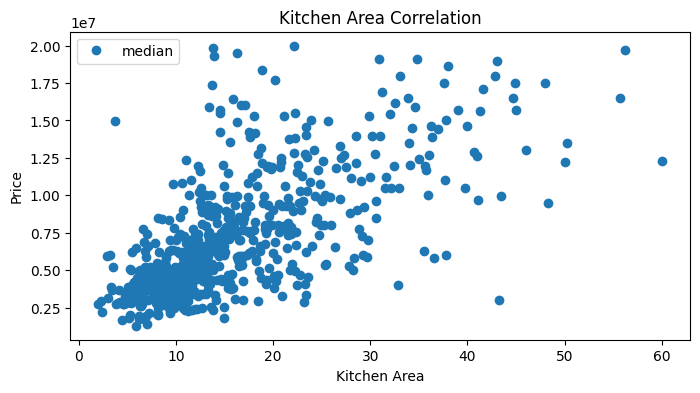

In [77]:
# исследуем зависимость стоимости объекта от площади кухни
display(data_new['last_price'].corr(data_new['kitchen_area']))
kitchen_area_pivot_table = data_new.pivot_table(
    index='kitchen_area',
    values='last_price',
    aggfunc=['count', 'mean', 'median']
)
kitchen_area_pivot_table.columns = ['count', 'mean', 'median']
kitchen_area_pivot_table.plot(
    y='median',
    figsize=(8, 4),
    style='o'
)
plt.title('Kitchen Area Correlation')
plt.xlabel('Kitchen Area')
plt.ylabel('Price')
plt.show()

Зависимость общей стоимости с площадью кухни чуть менее выраженная, но всё ещё легко заметна. Чем больше площадь кухни, тем выше цена объекта.

0.5029844933498011

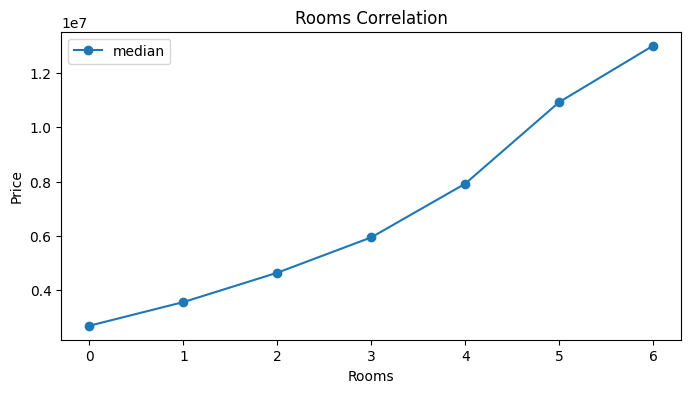

In [78]:
# исследуем зависимость стоимости объекта от количества комнат
display(data_new['last_price'].corr(data_new['rooms']))
rooms_pivot_table = data_new.pivot_table(
    index='rooms',
    values='last_price',
    aggfunc=['count', 'mean', 'median']
)
rooms_pivot_table.columns = ['count', 'mean', 'median']
rooms_pivot_table.plot(
    y='median',
    figsize=(8, 4),
    style='-o'
)
plt.title('Rooms Correlation')
plt.xlabel('Rooms')
plt.ylabel('Price')
plt.show()

По данному графику видна прямая зависимость стоимости объекта от количества комнат в нём.

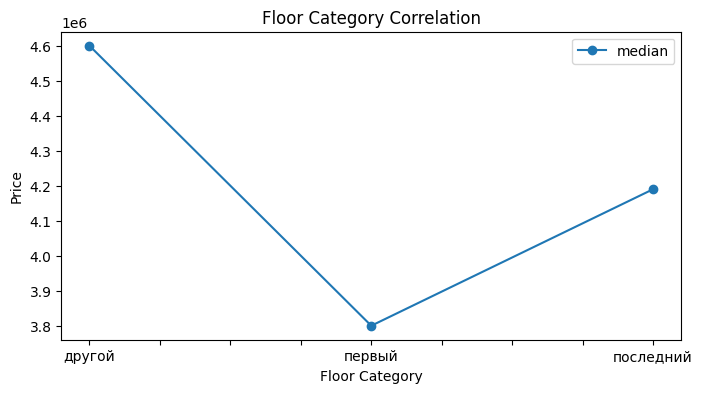

In [79]:
# исследуем зависимость стоимости объекта от типа этажа
floor_category_pivot_table = data_new.pivot_table(
    index='floor_category',
    values='last_price',
    aggfunc=['count', 'mean', 'median']
)
floor_category_pivot_table.columns = ['count', 'mean', 'median']
floor_category_pivot_table.plot(
    y='median',
    figsize=(8, 4),
    style='-o'
)
plt.title('Floor Category Correlation')
plt.xlabel('Floor Category')
plt.ylabel('Price')
plt.show()

По графику видим, что самые дешёвые квартиры - на первом этаже, квартиры на последнем этаже немного дороже, а квартиры на других этажах существенно дороже обоих предыдущих вариантов.

-0.011964988410282644

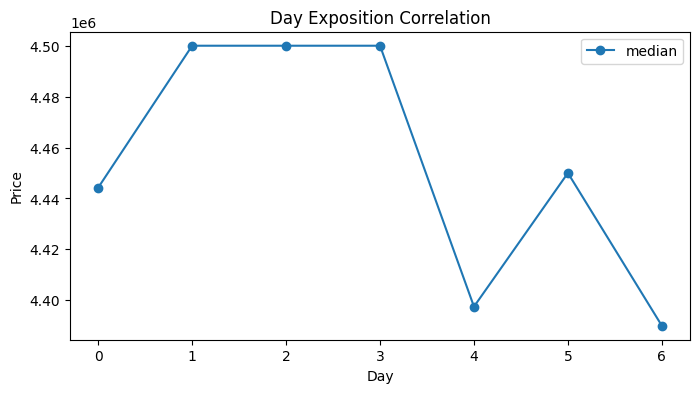

In [80]:
# исследуем зависимость стоимости объекта от дня размещения
display(data_new['last_price'].corr(data_new['day_exposition']))
day_exposition_pivot_table = data_new.pivot_table(
    index='day_exposition',
    values='last_price',
    aggfunc=['count', 'mean', 'median']
)
day_exposition_pivot_table.columns = ['count', 'mean', 'median']
day_exposition_pivot_table.plot(
    y='median',
    figsize=(8, 4),
    style='-o'
)
plt.title('Day Exposition Correlation')
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()

Корреляции практически нет, график также демонстрирует отсутствие чёткой зависимости, что логично, так как в любой день могут выставить на продажу объект по любой цене. Можно было бы сказать, что в начале недели выставляют более дорогие объекты недвижимости, но цена различается незначительно.

0.00933768424547633

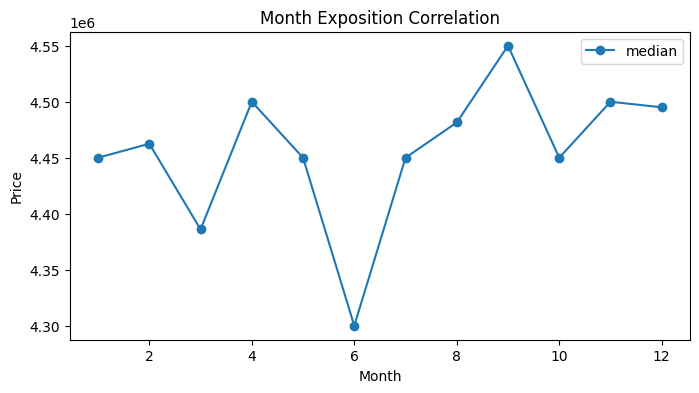

In [81]:
# исследуем зависимость стоимости объекта от месяца размещения
display(data_new['last_price'].corr(data_new['month_exposition']))
month_exposition_pivot_table = data_new.pivot_table(
    index='month_exposition',
    values='last_price',
    aggfunc=['count', 'mean', 'median']
)
month_exposition_pivot_table.columns = ['count', 'mean', 'median']
month_exposition_pivot_table.plot(
    y='median',
    figsize=(8, 4),
    style='-o'
)
plt.title('Month Exposition Correlation')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()

Так же, как и с днём размещения, корреляции практически нет, график демонстрирует небольшую зависимость стоимости объекта от месяца размещения объявления - так в июне медианная цена размещаемых объектов недвижимости минимальна, а в апреле и сентябре немного выше, чем в остальное время года.

-0.04356406642414224

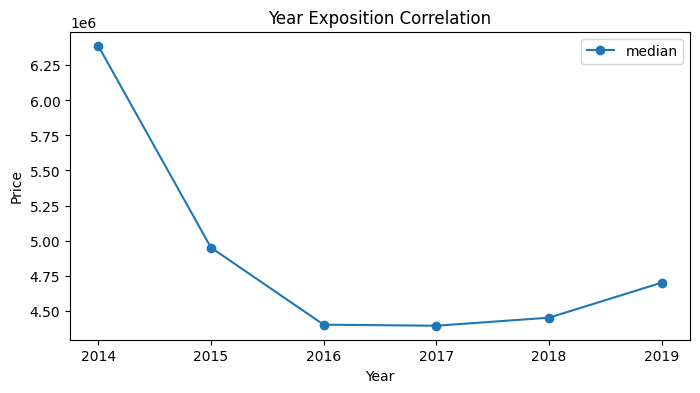

In [82]:
# исследуем зависимость стоимости объекта от года размещения
display(data_new['last_price'].corr(data_new['year_exposition']))
year_exposition_pivot_table = data_new.pivot_table(
    index='year_exposition',
    values='last_price',
    aggfunc=['count', 'mean', 'median']
)
year_exposition_pivot_table.columns = ['count', 'mean', 'median']
year_exposition_pivot_table.plot(
    y='median',
    figsize=(8, 4),
    style='-o'
)
plt.title('Year Exposition Correlation')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

Корреляции нет, график показывает, что в 2014 году медианная цена, выставленных на продажу объектов недвижимости, была значительно выше, чем в последующие годы.

## Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [83]:
# создадим сводную таблицу по именам населённых пунктов, количеству объявлений и средней стоимости кв. метра в них
locality_name_count_pivot_table = data_new.pivot_table(
    index='locality_name',
    values='price_per_square_meter',
    aggfunc=['count', 'mean']
)
locality_name_count_pivot_table.columns = ['count', 'mean']
locality_name_count_pivot_table = locality_name_count_pivot_table \
    .sort_values(by='count', ascending=False) \
    .head(10)
# найдём населённый пункт с самой низкой стоимостью квадратного метра
display(locality_name_count_pivot_table[locality_name_count_pivot_table['mean'] == 
                                        locality_name_count_pivot_table['mean'].min()])
# найдём населённый пункт с самой высокой стоимостью квадратного метра
display(locality_name_count_pivot_table[locality_name_count_pivot_table['mean'] == 
                                        locality_name_count_pivot_table['mean'].max()])
locality_name_count_pivot_table

,count,mean
locality_name,,
Выборг,204,57095.289216


,count,mean
locality_name,,
Санкт-Петербург,12785,106995.16011


,count,mean
locality_name,,
Санкт-Петербург,12785,106995.160110
Мурино,545,85837.715596
Шушары,404,77937.146040
Всеволожск,331,66919.728097
Колпино,304,74719.858553
Парголово,299,89621.585284
Кудрово,294,92421.568027
Пушкин,290,100915.493103
Гатчина,268,67928.294776


Первое место по количеству объявлений ожидаемо и с большим отрывом занимает **Санкт-Петербург** - **12785** объявлений. На 10 месте по количеству объявлений **Выборг** и там **204** объявления. \
\
Из 10 населённых пунтков с самым большим количеством объявлений, **самая низкая цена кв. метра** недвижимости - в **Выборге**, а **самая высокая цена кв. метра** - в Санкт-Петербурге.

## Вычислим среднюю цену километра расстояния от центра до объекта недвижимости в Санкт-Петербурге

<AxesSubplot:xlabel='cityCenters_nearest_km'>

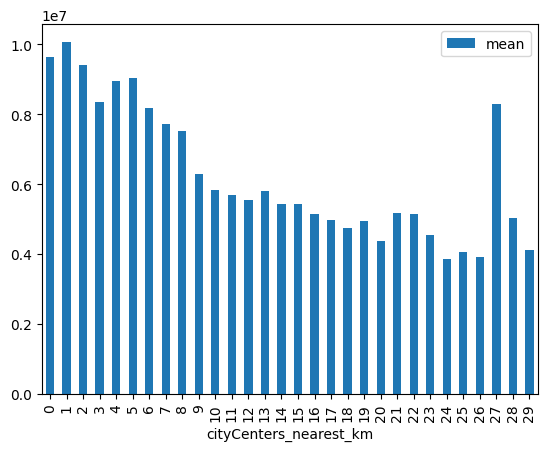

In [84]:
# создадим сводную таблицу по Санкт-Петербургу со стоимостью объекта и расстоянием до центра в км
# для удобства рассчётов переведём столбец "cityCenters_nearest_km" к типу "int"
data_new = data_new.astype(
    {'cityCenters_nearest_km': 'int64'}
)
price_per_km_pivot_table = data_new \
    .query('locality_name == "Санкт-Петербург"') \
    .pivot_table(index='cityCenters_nearest_km',
                 values='last_price',
                aggfunc=['mean']
                )
price_per_km_pivot_table.columns = ['mean']
price_per_km_pivot_table.plot(
    kind='bar'
)

По данным, ожидаемо, прослеживается закономерность, что, чем ближе к центру находится жильё, тем выше его стоимость. И уже примерно с **17 км** от центра, цена падает практически вдвое, продолжая снижаться по мере удаления. На столбчатой диаграмме виден пик на **27** км, можно предположить, что это объекты в одном из элитных пригородных районов **Петербурга**.

## Общий вывод
По итогам исследования мы выяснили, что наибольшее количество объектов недвижимости имеют `площадь` от **30** до **75** кв. метров. Наиболее распространённый показатель `жилой площади` - **около 20** и **около 30** кв. метров. А `площадь кухни` от **5** до **15** кв. метров. \
`Цены` на большее количество объектов находятся в диапазоне между **2,5** и **6,5** млн. Чаще всего это квартиры с **1-3** `комнатами` и `высотой потолков` в районе **2,5 - 2,8** м., находящиеся на `этажах` до **6**. \
Данные квартиры в среднем находятся в **13-15** км от центра города, в **30** км от аэропорта и в **500** м от ближайшего парка. \
\
`Объявления` чаще `размещались` по **рабочим дням** и более активно **весной** и **осенью**. В среднем `размещение` было на протяжении **165** дней, хотя медианное значение (**92**) указывает на существенное влияние крайних значений - таких как, например, **1** день и **1000** дней. \
\
В ходе исследования было установлено, что набольшее влияние на `стоимость объекта` имеют `общая` и `жилая площадь` - чем **больше площадь**, тем **выше цена**; `количество комнат` - чем **больше комнат**, тем **выше цена** и `тип этажа` квартиры - квартиры на **первых** и **последних** этажах в среднем дешевле. \
Что касается зависимости от `дня`, `месяца` и `года` размещения объявления, то подтверждается факт большего спроса на квартиры **весной** и **осенью** - пиками корреляции между `стоимостью` и `месяцем размещения`, а также выделяется факт большого числа **дорогих объектов** недвижимости, выставленных на продажу в **2014** году. \
\
При анализе распределения объявлений по `населённым пунктам`, ожидаемо и с большим отрывом лидирует **Санкт-Петербург**. Также он лидирует и по `средней стоимости квадратного метра` недвижимости. Но если количество объявлений в **Санкт-Петербурге** в среднем почти в **40** раз больше других `населённых пунктов`, `цена за квадратный метр` отличается незначительно, за исключением **Выборга**, **Гатчины** и **Всеволожска**. \
\
Что касается `средней стоимости` недвижимости в зависимости от `удалённости от центра города`, то ожидаемо видна прямая зависимость - чем **дальше от центра**, тем **средняя стоимость жилья ниже** за исключением значения в **27** км, так как на этом расстоянии находится какой-то элитный жилой комплекс и это видно по всплеску на графике.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод